# Data Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Data Manipulation - Sheet1.csv')

In [151]:
df.head()

,smartphone,belajar,aktifitas,meningkat,ipk,semester,prodi,browsing,sosmed,transportasi,finansial
0,7,8,Browsing,Ya,3.60,3,Teknologi Informasi,1,0,0,0
1,6,6,"Browsing, Finansial",Ya,3.68,3,Teknologi Informasi,1,1,0,1
2,6,7,"Browsing, Sosial Media",Ya,3.50,3,Teknologi Informasi,1,1,0,0
3,6,6,"Browsing, Sosial Media",Ya,3.81,3,Teknologi Informasi,1,1,0,0
4,10,2,"Browsing, Sosial Media",Ya,3.75,3,Teknologi Informasi,1,1,0,0


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
smartphone      100 non-null int64
belajar         100 non-null int64
aktifitas       100 non-null object
meningkat       100 non-null object
ipk             100 non-null float64
semester        100 non-null int64
prodi           100 non-null object
browsing        100 non-null int64
sosmed          100 non-null int64
transportasi    100 non-null int64
finansial       100 non-null int64
dtypes: float64(1), int64(7), object(3)
memory usage: 8.7+ KB


In [153]:
df.describe()

,smartphone,belajar,ipk,semester,browsing,sosmed,transportasi,finansial
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,6.540000,5.610000,3.417300,3.440000,0.85000,0.980000,0.240000,0.320000
std,2.641625,2.382152,0.294151,0.832666,0.35887,0.140705,0.429235,0.468826
min,3.000000,0.000000,2.000000,3.000000,0.00000,0.000000,0.000000,0.000000
25%,5.000000,5.000000,3.297500,3.000000,1.00000,1.000000,0.000000,0.000000
50%,6.000000,6.000000,3.480000,3.000000,1.00000,1.000000,0.000000,0.000000
75%,8.000000,7.000000,3.600000,3.000000,1.00000,1.000000,0.000000,1.000000
max,16.000000,12.000000,3.900000,5.000000,1.00000,1.000000,1.000000,1.000000


#### Jumlah Responden

In [154]:
sns.set_style('darkgrid')

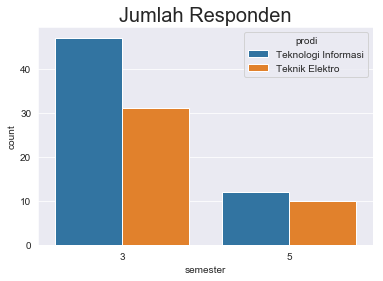

In [155]:
plt.title('Jumlah Responden',fontsize=20)
sns.countplot(x='semester',hue='prodi',data=df)
plt.savefig('Jumlah Responden.png')

In [156]:
print('Jumlah responden total {} dimana\nTE semester 3 adalah {},\nTI semester 3 adalah {},\nTE semester 5 adalah {},\nTI semester 5 adalah {}'
      .format(df['ipk'].count(),
            df[(df['semester']==3) & (df['prodi']=='Teknik Elektro')]['ipk'].count(),
            df[(df['semester']==3) & (df['prodi']=='Teknologi Informasi')]['ipk'].count(),
            df[(df['semester']==5) & (df['prodi']=='Teknik Elektro')]['ipk'].count(),
            df[(df['semester']==5) & (df['prodi']=='Teknologi Informasi')]['ipk'].count()))

Jumlah responden total 100 dimana
TE semester 3 adalah 31,
TI semester 3 adalah 47,
TE semester 5 adalah 10,
TI semester 5 adalah 12


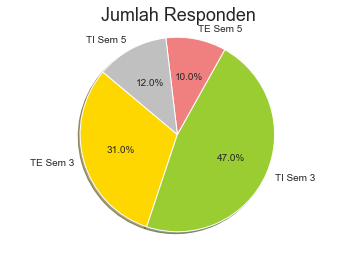

In [157]:
labels = 'TE Sem 3', 'TI Sem 3', 'TE Sem 5', 'TI Sem 5'
sizes = [31, 47, 10, 12]
colors = ['gold', 'yellowgreen', 'lightcoral', 'silver']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Jumlah Responden',fontsize=18)
plt.axis('equal')

plt.savefig('Responden Pie.png')

# Data Analysis

#### Korelasi antar data

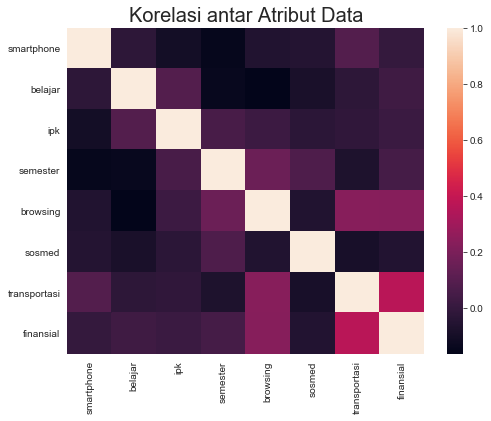

In [81]:
plt.figure(figsize=(8,6))
plt.title('Korelasi antar Atribut Data',fontsize=20)
sns.heatmap(data=df.corr())
plt.savefig('Korelasi antar atribut data.png')

In [82]:
df.corr()

,smartphone,belajar,ipk,semester,browsing,sosmed,transportasi,finansial
smartphone,1.000000,-0.023981,-0.102100,-0.145849,-0.062865,-0.052178,0.089440,-0.002284
belajar,-0.023981,1.000000,0.089155,-0.136681,-0.163647,-0.083778,-0.026080,0.031475
ipk,-0.102100,0.089155,1.000000,0.055213,0.021960,-0.030604,-0.016416,0.016583
semester,-0.145849,-0.136681,0.055213,1.000000,0.155494,0.075869,-0.072350,0.049680
browsing,-0.062865,-0.163647,0.021960,0.155494,1.000000,-0.060012,0.236067,0.228139
sosmed,-0.052178,-0.083778,-0.030604,0.075869,-0.060012,1.000000,-0.086969,-0.055125
transportasi,0.089440,-0.026080,-0.016416,-0.072350,0.236067,-0.086969,1.000000,0.367425
finansial,-0.002284,0.031475,0.016583,0.049680,0.228139,-0.055125,0.367425,1.000000


Tidak ada data yang berhubungan multicolinearitas

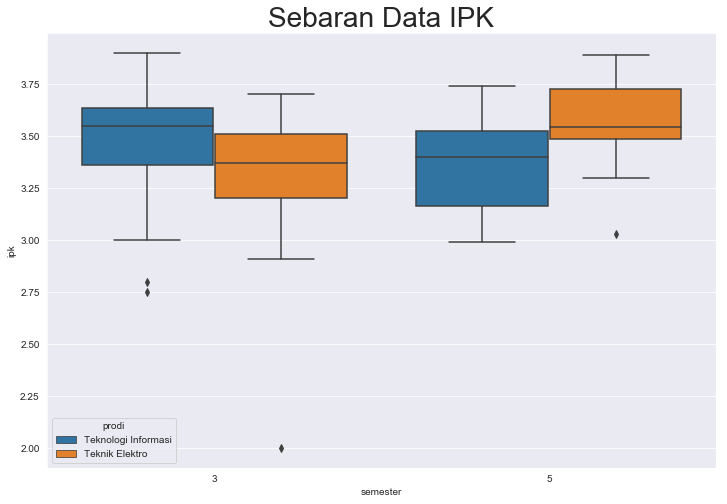

In [83]:
plt.figure(figsize=(12,8))
plt.title('Sebaran Data IPK',fontsize=28)
sns.boxplot(x='semester',y='ipk',hue='prodi',data=df)
plt.savefig('Sebaran IPK.png')

#### Dilihat dari median responden yang memiliki nilai tengah 3.48. Namun kami akan mengklasifikasikannya menjadi > 3.5 dan <= 3.5 sebagai patokan IPK responden di ranah cumlaude atau tidak

In [3]:
def impute_ipk(ipk):
    if ipk > 3.5:
        return 'Ya'
    else:
        return 'Belum'
df['cumlaude']=df['ipk'].apply(impute_ipk)

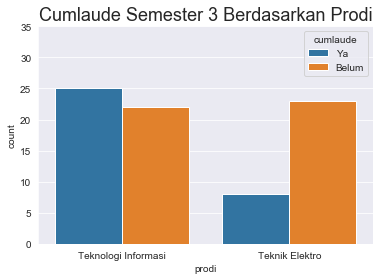

In [159]:
plt.title('Cumlaude Semester 3 Berdasarkan Prodi',fontsize=18)
sns.countplot(x='prodi',hue='cumlaude',data=df[df['semester']==3])
plt.ylim(0,35)
plt.savefig('Cumlaude sem 3.png')

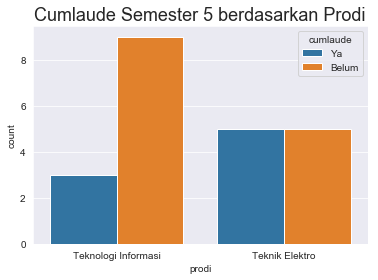

In [161]:
plt.title('Cumlaude Semester 5 berdasarkan Prodi',fontsize=18)
sns.countplot(x='prodi',hue='cumlaude',data=df[df['semester']==5],hue_order=['Ya','Belum'])
plt.savefig('Cumlaude sem 5.png')

In [162]:
print('Jumlah responden total {} dimana\nTE semester 3 cumlaude adalah {},\nTI semester 3 cumlaude adalah {},\nTE semester 3 belum cumlaude adalah {},\nTI semester 3 belum cumlaude adalah {},\nTE semester 5 cumlaude adalah {},\nTI semester 5 cumlaude adalah {},\nTE semester 3 belum cumlaude adalah {},\nTI semester 3 belum cumlaude adalah {}'
      .format(df['ipk'].count(),
            df[(df['semester']==3) & (df['prodi']=='Teknik Elektro') & (df['cumlaude']=='Ya')]['ipk'].count(),
            df[(df['semester']==3) & (df['prodi']=='Teknologi Informasi') & (df['cumlaude']=='Ya')]['ipk'].count(),
            df[(df['semester']==3) & (df['prodi']=='Teknik Elektro') & (df['cumlaude']=='Belum')]['ipk'].count(),
            df[(df['semester']==3) & (df['prodi']=='Teknologi Informasi') & (df['cumlaude']=='Belum')]['ipk'].count(),
            df[(df['semester']==5) & (df['prodi']=='Teknik Elektro') & (df['cumlaude']=='Ya')]['ipk'].count(),
            df[(df['semester']==5) & (df['prodi']=='Teknologi Informasi') & (df['cumlaude']=='Ya')]['ipk'].count(),
            df[(df['semester']==5) & (df['prodi']=='Teknik Elektro') & (df['cumlaude']=='Belum')]['ipk'].count(),
            df[(df['semester']==5) & (df['prodi']=='Teknologi Informasi') & (df['cumlaude']=='Belum')]['ipk'].count()))

Jumlah responden total 100 dimana
TE semester 3 cumlaude adalah 8,
TI semester 3 cumlaude adalah 25,
TE semester 3 belum cumlaude adalah 23,
TI semester 3 belum cumlaude adalah 22,
TE semester 5 cumlaude adalah 5,
TI semester 5 cumlaude adalah 3,
TE semester 3 belum cumlaude adalah 5,
TI semester 3 belum cumlaude adalah 9


#### Selain itu, TI Sem 3 dan TE Sem 5 mudah cumlaude sedangkan TE Sem 3 dan TI Sem 5 susah cumlaude

In [4]:
def impute_mudah(cols):
    semester = cols[0]
    prodi = cols[1]
    
    if (semester == 3) & (prodi == 'Teknik Elektro'):
        return 'Tidak'
    elif (semester == 3) & (prodi == 'Teknologi Informasi'):
        return 'Ya'
    elif (semester == 5) & (prodi == 'Teknik Elektro'):
        return 'Tidak'
    else:
        return 'Ya'
df['mudah_cumlaude']=df[['semester','prodi']].apply(impute_mudah,axis=1)

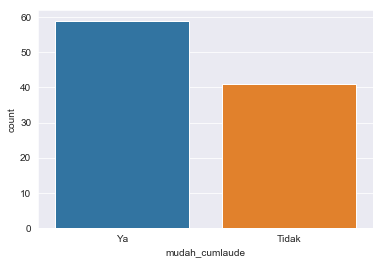

In [164]:
sns.countplot(x='mudah_cumlaude',data=df)

#### Perbandingan Waktu Belajar dan Penggunaan Smartphone (Habit Responden dalam kehidupan sehari-hari)

C:\Users\Rizki Prastyo\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


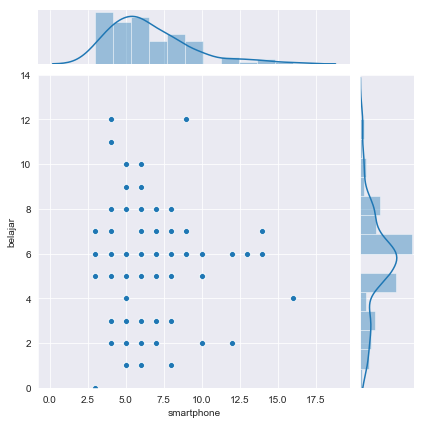

In [165]:
g = sns.JointGrid(x="smartphone", y="belajar", data=df, ylim=(0,14))
g = g.plot(sns.scatterplot, sns.distplot)
plt.savefig('dasar pembagian tipe.png')

Karena tidak ada korelasi diantara keduanya, maka tidak dapat ditentukan persamaan regresi linear diantara keduanya. Namun dari data ini dapat dikelompokkan menjadi 4 tipe responden

In [5]:
def impute_tipe(cols):
    smartphone = cols[0]
    belajar = cols[1]
    
    if (smartphone <= 6) & (belajar <= 6):
        return 'Aktif Bersosialisasi'
    elif (smartphone <= 6) & (belajar > 6):
        return 'Ambisius'
    elif (smartphone > 6) & (belajar <= 6):
        return 'No Life'
    else:
        return 'No Friend'
df['tipe_responden']=df[['smartphone','belajar']].apply(impute_tipe,axis=1)

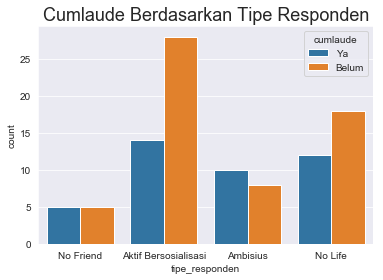

In [170]:
plt.title('Cumlaude Berdasarkan Tipe Responden',fontsize=18)
sns.countplot(x='tipe_responden',hue='cumlaude',data=df)
plt.savefig('tipe cumlaude.png')

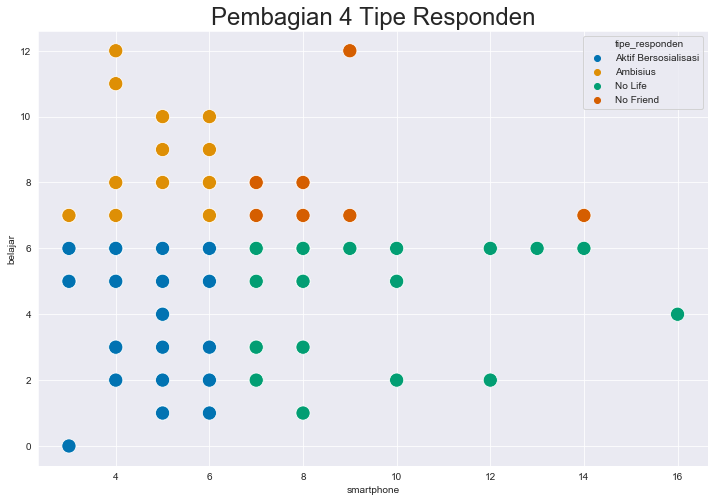

In [171]:
plt.figure(figsize=(12,8))
plt.title('Pembagian 4 Tipe Responden',fontsize=24)
sns.scatterplot(x='smartphone',y='belajar',data=df,hue='tipe_responden',s=200,palette='colorblind',
                hue_order=['Aktif Bersosialisasi','Ambisius','No Life','No Friend'])
plt.savefig('Tipe Responden.png')

In [172]:
df['tipe_responden'].value_counts()

Aktif Bersosialisasi    42
No Life                 30
Ambisius                18
No Friend               10
Name: tipe_responden, dtype: int64

#### Responden ngapain aja sih sama smartphone nya?

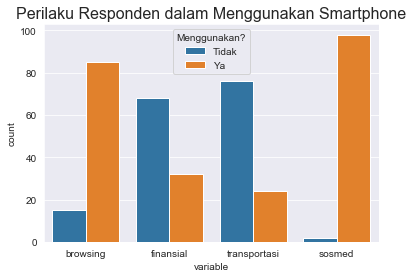

In [182]:
plt.title('Perilaku Responden dalam Menggunakan Smartphone',fontsize=16)
sns.countplot(x="variable", hue="value", data=pd.melt(df[['browsing','finansial','transportasi','sosmed']]))
plt.legend(title='Menggunakan?',labels=['Tidak','Ya'])
plt.savefig('Perilaku Responden.png')

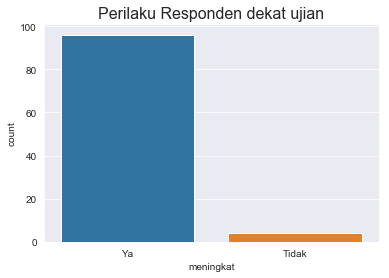

In [97]:
plt.title('Perilaku Responden dekat ujian',fontsize=16)
sns.countplot(x='meningkat',data=df)
plt.savefig('Perilaku dekat ujian.png')

Karena terdapat kesenjangan yang cukup tinggi pada kolom sosmed dan meningkat, maka kedua kolom ini dapat didrop

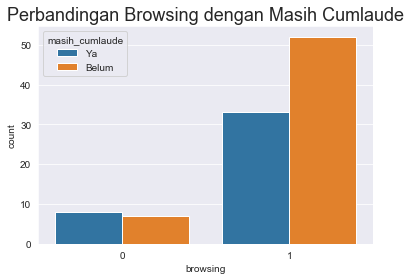

In [98]:
plt.title('Perbandingan Browsing dengan Masih Cumlaude',fontsize=18)
sns.countplot(x='browsing',hue='masih_cumlaude',data=df)
plt.savefig('Browsing mudah cumlaude.png')

Responden yang suka browsing mudah cumlaude

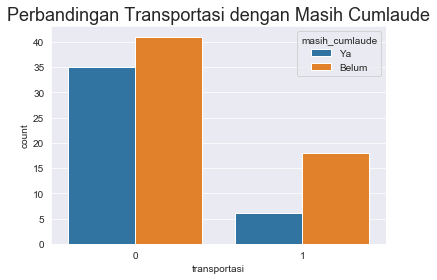

In [99]:
plt.title('Perbandingan Transportasi dengan Masih Cumlaude',fontsize=18)
sns.countplot(x='transportasi',hue='masih_cumlaude',data=df)
plt.savefig('Transportaso mudah cumlaude.png')

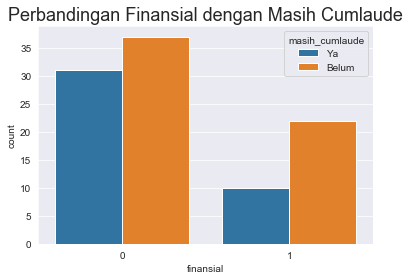

In [100]:
plt.title('Perbandingan Finansial dengan Masih Cumlaude',fontsize=18)
sns.countplot(x='finansial',hue='masih_cumlaude',data=df)
plt.savefig('Finansial mudah cumlaude.png')

Transportasi dan finansial tidak ada korelasinya

# Data Cleaning

In [101]:
print('Jumlah responden total {} dimana\nTE semester 3 adalah {},\nTI semester 3 adalah {},\nTE semester 5 adalah {},\nTI semester 5 adalah {}'
      .format(df['ipk'].count(),
            df[(df['semester']==3) & (df['prodi']=='Teknik Elektro')]['ipk'].count(),
            df[(df['semester']==3) & (df['prodi']=='Teknologi Informasi')]['ipk'].count(),
            df[(df['semester']==5) & (df['prodi']=='Teknik Elektro')]['ipk'].count(),
            df[(df['semester']==5) & (df['prodi']=='Teknologi Informasi')]['ipk'].count()))

Jumlah responden total 100 dimana
TE semester 3 adalah 31,
TI semester 3 adalah 47,
TE semester 5 adalah 10,
TI semester 5 adalah 12


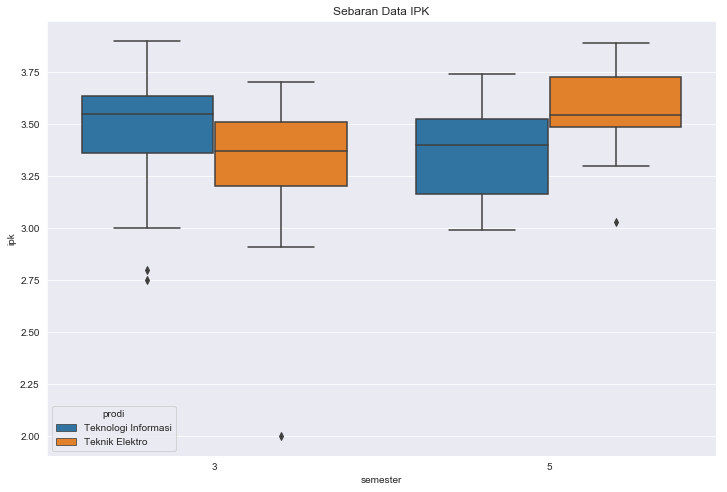

In [102]:
plt.figure(figsize=(12,8))
plt.title('Sebaran Data IPK')
sns.boxplot(x='semester',y='ipk',hue='prodi',data=df)

### Terdapat beberapa data oulier yang dapat mengganggu model, maka harus dibersihkan

In [103]:
df[(df['semester']==3) & (df['prodi']=='Teknik Elektro') & (df['ipk']<2.9)]

,smartphone,belajar,aktifitas,meningkat,ipk,semester,prodi,browsing,sosmed,transportasi,finansial,masih_cumlaude,mudah_cumlaude,tipe_responden
28,16,4,"Browsing, Sosial Media",Ya,2.0,3,Teknik Elektro,1,1,0,0,Belum,Tidak,No Life


In [104]:
df[(df['semester']==3) & (df['prodi']=='Teknologi Informasi') & (df['ipk']<3)]

,smartphone,belajar,aktifitas,meningkat,ipk,semester,prodi,browsing,sosmed,transportasi,finansial,masih_cumlaude,mudah_cumlaude,tipe_responden
29,12,2,"Browsing, Sosial Media",Ya,2.75,3,Teknologi Informasi,1,1,0,0,Belum,Ya,No Life
83,4,5,"Sosial Media, Finansial, Browsing, Transportasi",Ya,2.80,3,Teknologi Informasi,1,1,1,1,Belum,Ya,Aktif Bersosialisasi


In [105]:
df[(df['semester']==5) & (df['prodi']=='Teknik Elektro') & (df['ipk']<3.25)]

,smartphone,belajar,aktifitas,meningkat,ipk,semester,prodi,browsing,sosmed,transportasi,finansial,masih_cumlaude,mudah_cumlaude,tipe_responden
17,4,3,"Browsing, Sosial Media",Ya,3.03,5,Teknik Elektro,1,1,0,0,Belum,Tidak,Aktif Bersosialisasi


In [6]:
df.drop(labels=[17,28,29,83],axis=0,inplace=True)

#### Data setelah dibersihkan

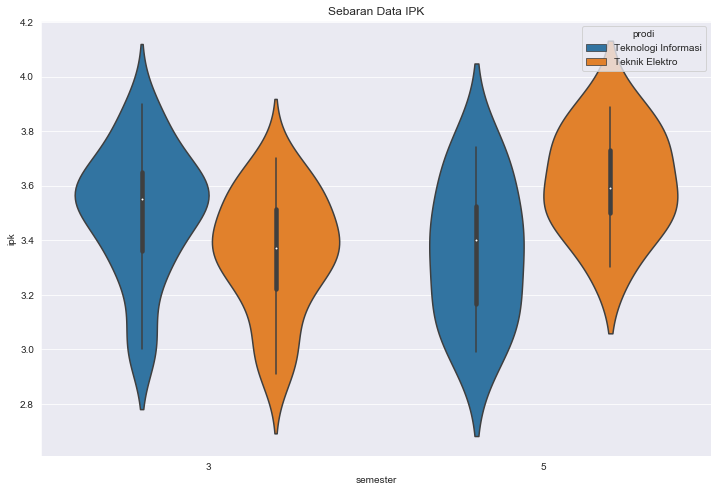

In [107]:
plt.figure(figsize=(12,8))
plt.title('Sebaran Data IPK')
sns.violinplot(x='semester',y='ipk',hue='prodi',data=df)
plt.savefig('penghapusan outlier.png')

#### Jumlah data setelah dibersihkan

In [108]:
print('Jumlah responden total {} dimana\nTE semester 3 adalah {},\nTI semester 3 adalah {},\nTE semester 5 adalah {},\nTI semester 5 adalah {}'
      .format(df['ipk'].count(),
            df[(df['semester']==3) & (df['prodi']=='Teknik Elektro')]['ipk'].count(),
            df[(df['semester']==3) & (df['prodi']=='Teknologi Informasi')]['ipk'].count(),
            df[(df['semester']==5) & (df['prodi']=='Teknik Elektro')]['ipk'].count(),
            df[(df['semester']==5) & (df['prodi']=='Teknologi Informasi')]['ipk'].count()))

Jumlah responden total 96 dimana
TE semester 3 adalah 30,
TI semester 3 adalah 45,
TE semester 5 adalah 9,
TI semester 5 adalah 12


In [109]:
print('Median responden total {} dimana\nTE semester 3 adalah {:1.2f},\nTI semester 3 adalah {},\nTE semester 5 adalah {},\nTI semester 5 adalah {}'
      .format(df['ipk'].median(),
            df[(df['semester']==3) & (df['prodi']=='Teknik Elektro')]['ipk'].median(),
            df[(df['semester']==3) & (df['prodi']=='Teknologi Informasi')]['ipk'].median(),
            df[(df['semester']==5) & (df['prodi']=='Teknik Elektro')]['ipk'].median(),
            df[(df['semester']==5) & (df['prodi']=='Teknologi Informasi')]['ipk'].median()))

Median responden total 3.5 dimana
TE semester 3 adalah 3.37,
TI semester 3 adalah 3.55,
TE semester 5 adalah 3.59,
TI semester 5 adalah 3.4


# Data Manipulation

In [7]:
df.drop(labels=['ipk','aktifitas','sosmed','meningkat','prodi','semester','transportasi',
                'finansial','smartphone','belajar'],axis=1,inplace=True)

In [8]:
df = pd.get_dummies(data=df,columns=['tipe_responden'],drop_first=True)

In [9]:
df = pd.get_dummies(data=df,columns=['mudah_cumlaude'],drop_first=True)

# Data Train

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 99
Data columns (total 6 columns):
browsing                    96 non-null int64
masih_cumlaude              96 non-null object
tipe_responden_Ambisius     96 non-null uint8
tipe_responden_No Friend    96 non-null uint8
tipe_responden_No Life      96 non-null uint8
mudah_cumlaude_Ya           96 non-null uint8
dtypes: int64(1), object(1), uint8(4)
memory usage: 5.1+ KB


In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('cumlaude',axis=1)
y = df['cumlaude']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Data Modelling

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
predictions = dtree.predict(X_test)

# Report

## Train Test Split

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       Belum       0.53      0.67      0.59        15
          Ya       0.50      0.36      0.42        14

    accuracy                           0.52        29
   macro avg       0.51      0.51      0.50        29
weighted avg       0.51      0.52      0.51        29



In [20]:
print(confusion_matrix(y_test,predictions))

[[10  5]
 [ 9  5]]


## Cross Validation

In [124]:
from sklearn.model_selection import cross_val_score

In [125]:
print(cross_val_score(dtree, X, y, cv=5))

[0.55       0.47368421 0.42105263 0.31578947 0.36842105]


# Model

In [25]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import Image 
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn import tree

%matplotlib inline

C:\Users\Rizki Prastyo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [26]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

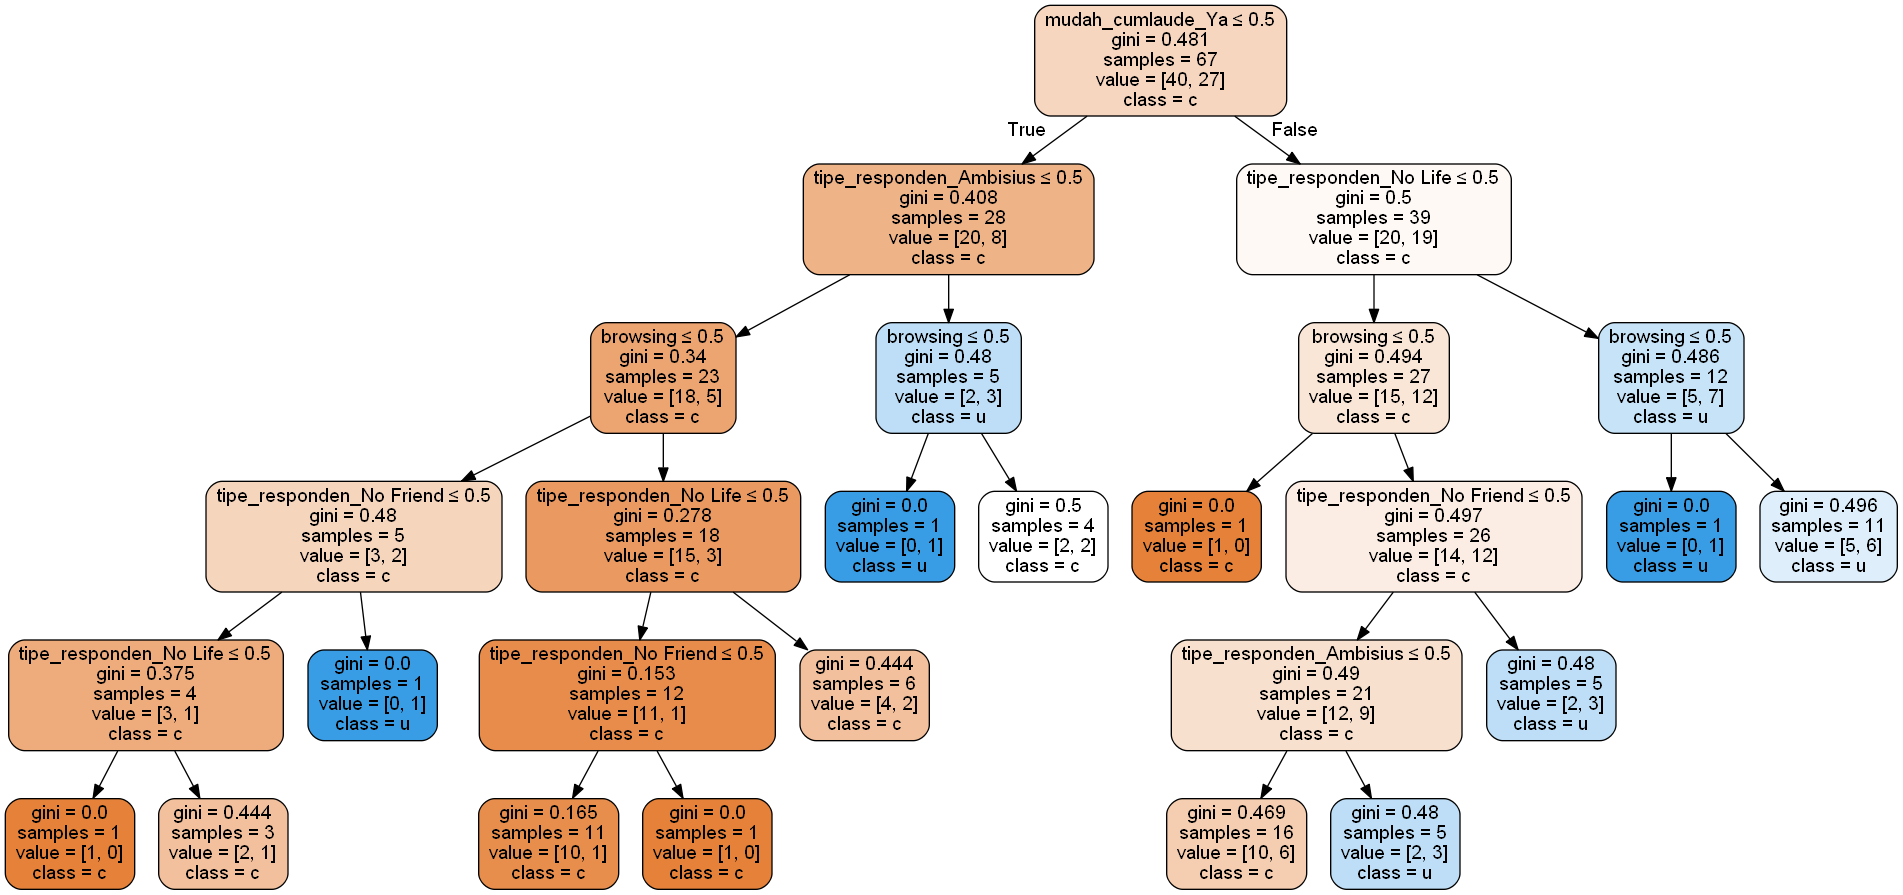

In [27]:
# Create DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=df.columns[1],
                                filled=True, rounded=True,  
                                special_characters=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [28]:
df.columns[1]

'cumlaude'

In [29]:
X_train.columns

Index(['browsing', 'tipe_responden_Ambisius', 'tipe_responden_No Friend',
       'tipe_responden_No Life', 'mudah_cumlaude_Ya'],
      dtype='object')

In [131]:
graph.write_png("figure 3 Nov.png")

True

In [36]:
df.head()

,browsing,cumlaude,tipe_responden_Ambisius,tipe_responden_No Friend,tipe_responden_No Life,mudah_cumlaude_Ya
0,1,Ya,0,1,0,1
1,1,Ya,0,0,0,1
2,1,Belum,1,0,0,1
3,1,Ya,0,0,0,1
4,1,Ya,0,0,1,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 99
Data columns (total 6 columns):
browsing                    96 non-null int64
cumlaude                    96 non-null object
tipe_responden_Ambisius     96 non-null uint8
tipe_responden_No Friend    96 non-null uint8
tipe_responden_No Life      96 non-null uint8
mudah_cumlaude_Ya           96 non-null uint8
dtypes: int64(1), object(1), uint8(4)
memory usage: 2.6+ KB


In [55]:
X_train[(X_train['mudah_cumlaude_Ya']==0) & (df['cumlaude']=='Belum')].count()

C:\Users\Rizki Prastyo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


browsing                    20
tipe_responden_Ambisius     20
tipe_responden_No Friend    20
tipe_responden_No Life      20
mudah_cumlaude_Ya           20
dtype: int64

# Test Data

In [133]:
test = pd.read_csv('Tes data - Sheet1.csv')

In [134]:
test.drop(labels=['ipk'],axis=1,inplace=True)

In [135]:
test.head()

,smartphone,belajar,aktivitas,meningkat,semester,prodi,browsing,sosmed,transportasi,finansial
0,5,6,"Browsing, Sosial Media, Finansial, Transportasi",Ya,5,Teknik Elektro,1,1,1,1
1,8,5,"Browsing, Sosial Media, Finansial",Ya,3,Teknik Elektro,1,1,0,1
2,2,9,"Browsing, Sosial Media",Ya,3,Teknologi Informasi,1,1,0,0
3,3,7,"Browsing, Sosial Media, Finansial, Transportasi",Ya,5,Teknologi Informasi,1,1,1,1


In [136]:
def impute_mudah(cols):
    semester = cols[0]
    prodi = cols[1]
    
    if (semester == 3) & (prodi == 'Teknik Elektro'):
        return 'Tidak'
    elif (semester == 3) & (prodi == 'Teknologi Informasi'):
        return 'Ya'
    elif (semester == 5) & (prodi == 'Teknik Elektro'):
        return 'Tidak'
    else:
        return 'Ya'
test['mudah_cumlaude']=test[['semester','prodi']].apply(impute_mudah,axis=1)

In [137]:
def impute_tipe(cols):
    smartphone = cols[0]
    belajar = cols[1]
    
    if (smartphone <= 6) & (belajar <= 6):
        return 'Aktif Bersosialisasi'
    elif (smartphone <= 6) & (belajar > 6):
        return 'Ambisius'
    elif (smartphone > 6) & (belajar <= 6):
        return 'No Life'
    else:
        return 'No Friend'
test['tipe_responden']=test[['smartphone','belajar']].apply(impute_tipe,axis=1)

In [138]:
def impute_tambah(cols):
    return 0
test['tipe_responden_No Friend']=test[['smartphone','belajar']].apply(impute_tambah,axis=1)

In [139]:
test.drop(labels=['sosmed','meningkat','prodi','semester','transportasi',
                'finansial','smartphone','belajar'],axis=1,inplace=True)

In [140]:
test.drop(labels=['aktivitas'],axis=1,inplace=True)

In [141]:
test.head()

,browsing,mudah_cumlaude,tipe_responden,tipe_responden_No Friend
0,1,Tidak,Aktif Bersosialisasi,0
1,1,Tidak,No Life,0
2,1,Ya,Ambisius,0
3,1,Ya,Ambisius,0


In [142]:
test = pd.get_dummies(data=test,columns=['tipe_responden'],drop_first=True)

In [143]:
test = pd.get_dummies(data=test,columns=['mudah_cumlaude'],drop_first=True)

In [144]:
test.head()

,browsing,tipe_responden_No Friend,tipe_responden_Ambisius,tipe_responden_No Life,mudah_cumlaude_Ya
0,1,0,0,0,0
1,1,0,0,1,0
2,1,0,1,0,1
3,1,0,1,0,1


# Predict using model

In [175]:
predict = dtree.predict(test)

In [176]:
submission = pd.read_csv('Tes Data IPK - Sheet1.csv')

In [178]:
submission['cumlaude'] = predict

In [179]:
submission.drop(labels='ipk',axis=1,inplace=True)

In [180]:
submission.to_csv('cumlaude.csv',index=False)

In [181]:
submission.head()

,cumlaude
0,Belum
1,Belum
2,Ya
3,Ya


# Great Job